# Simple Autoencoder

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.3818 - val_loss: 0.1887
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1780 - val_loss: 0.1529
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1487 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1313 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1203 - val_loss: 0.1134
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1131 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1078 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1033 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1000 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0979 - val_lo

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

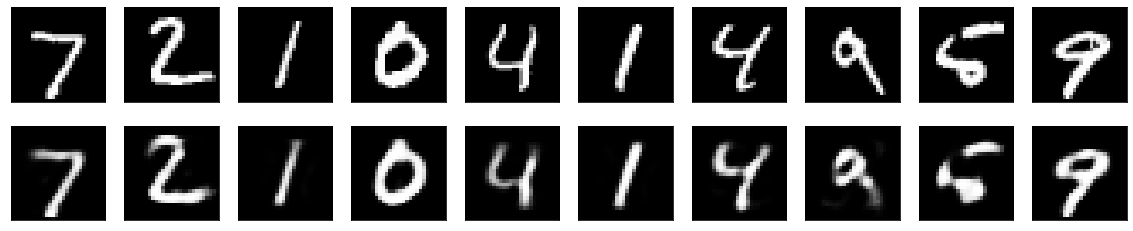

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Stacked Autoencoder

In [10]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [11]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 20ms/step - loss: 0.3361 - val_loss: 0.1681
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1601 - val_loss: 0.1377
Epoch 3/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1357 - val_loss: 0.1249
Epoch 4/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1244 - val_loss: 0.1173
Epoch 5/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1171 - val_loss: 0.1123
Epoch 6/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1125 - val_loss: 0.1086
Epoch 7/100
235/235 [==============================] - 5s 23ms/step - loss: 0.1093 - val_loss: 0.1061
Epoch 8/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1065 - val_loss: 0.1038
Epoch 9/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1051 - val_loss: 0.1024
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.103

235/235 [==============================] - 5s 20ms/step - loss: 0.0836 - val_loss: 0.0833
Epoch 81/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0836 - val_loss: 0.0836
Epoch 82/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0834 - val_loss: 0.0834
Epoch 83/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 84/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0834 - val_loss: 0.0834
Epoch 85/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0833 - val_loss: 0.0831
Epoch 86/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0833 - val_loss: 0.0833
Epoch 87/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0834 - val_loss: 0.0832
Epoch 88/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0833 - val_loss: 0.0832
Epoch 89/100
235/235 [==============================] - 5s 20ms/step - loss: 0.0833 - 

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

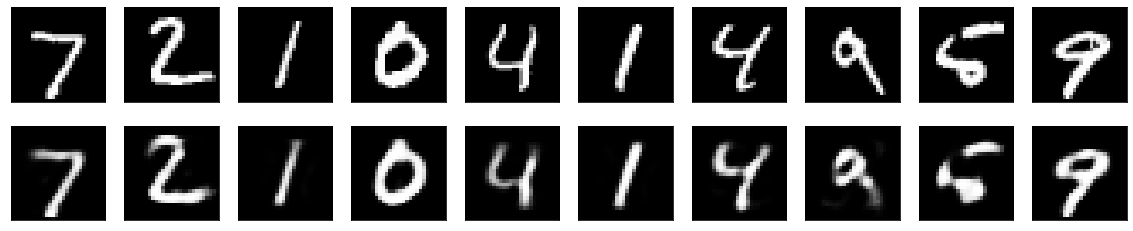

In [13]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()